In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(1460, 81)
(1459, 80)


In [4]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

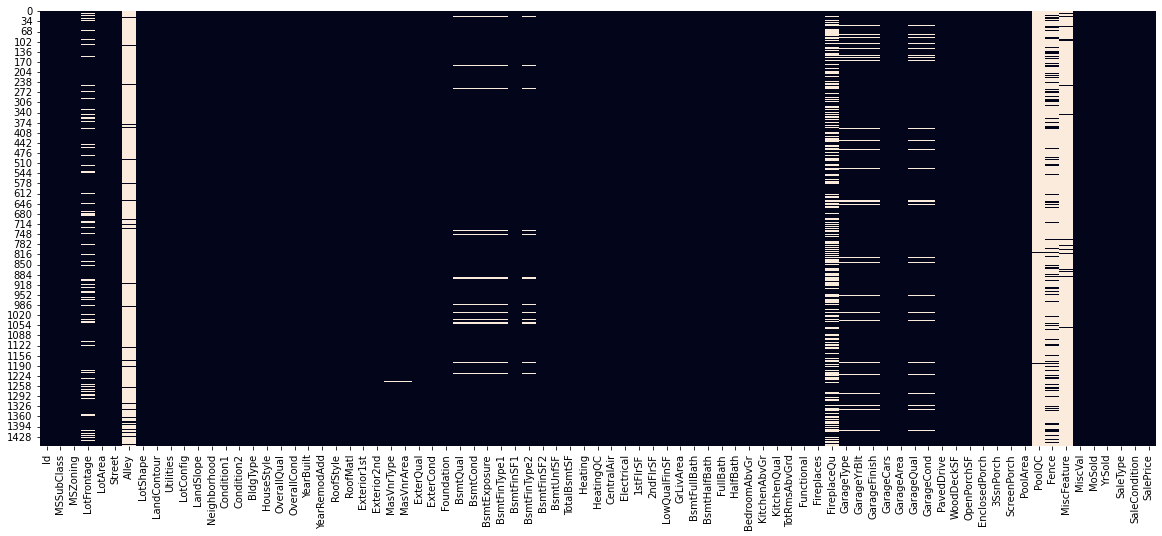

In [6]:
plt.figure(figsize = (20,8))
sns.heatmap(df_train.isnull(),cbar=False)

<AxesSubplot:>

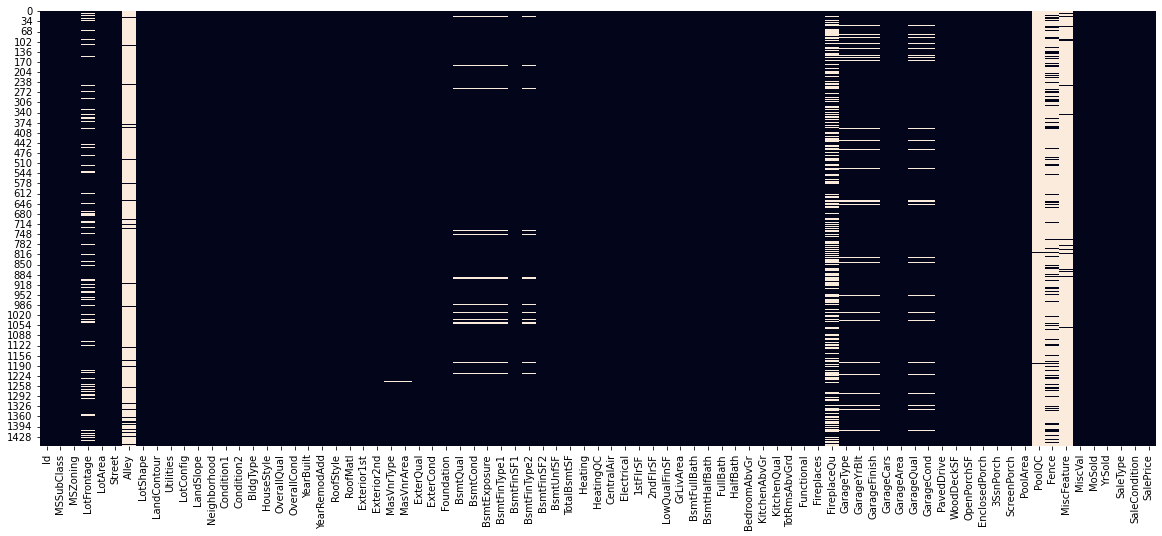

In [7]:
plt.figure(figsize = (20,8))
sns.heatmap(df_train.isnull(),cbar=False)

In [8]:
pd.options.display.min_rows = 80

df_train.isnull().sum().sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
                ... 
Condition2         0
Condition1         0
Neighborhood       0
LotConfig          0
YearBuilt          0
Utilities          0
LandContour        0
LotShape           0
Street             0
LotArea            0
MSZoning           0
OverallCond        0
YearRemodAdd       0
2ndFlrSF           0
BsmtFinSF2         0
1stFlrSF           0
CentralAir   

Dropping columns which having higher null values 

In [9]:
df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1, inplace = True)
df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage'],axis = 1, inplace = True)

filling null values 

In [10]:
df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].dropna().mode()[0],inplace = True)
df_train['GarageCond'].fillna(df_train['GarageCond'].dropna().mode()[0],inplace = True)
df_train['GarageType'].fillna(df_train['GarageType'].dropna().mode()[0],inplace = True)
df_train['GarageFinish'].fillna(df_train['GarageFinish'].dropna().mode()[0],inplace = True)
df_train['GarageQual'].fillna(df_train['GarageQual'].dropna().mode()[0],inplace = True)
df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].dropna().mode()[0],inplace = True)
df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].dropna().mode()[0],inplace = True)
df_train['BsmtQual'].fillna(df_train['BsmtQual'].dropna().mode()[0],inplace = True)
df_train['BsmtCond'].fillna(df_train['BsmtCond'].dropna().mode()[0],inplace = True)
df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].dropna().mode()[0],inplace = True)
df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].dropna().mode()[0],inplace = True)
df_train['MasVnrType'].fillna(df_train['MasVnrType'].dropna().mode()[0],inplace = True)
df_train['Electrical'].fillna(df_train['Electrical'].dropna().mode()[0],inplace = True)


In [11]:
pd.options.display.min_rows = 82
df_train.isnull().sum().sort_values(ascending = False)

Id               0
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
HeatingQC        0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
                ..
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
YearBuilt        0
RoofStyle        0
TotalBsmtSF      0
RoofMatl         0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinType2     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual    

In [12]:
df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].dropna().mode()[0],inplace = True)
df_test['GarageFinish'].fillna(df_test['GarageFinish'].dropna().mode()[0],inplace = True)
df_test['GarageQual'].fillna(df_test['GarageQual'].dropna().mode()[0],inplace = True)
df_test['GarageCond'].fillna(df_test['GarageCond'].dropna().mode()[0],inplace = True)
df_test['GarageType'].fillna(df_test['GarageType'].dropna().mode()[0],inplace = True)
df_test['BsmtCond'].fillna(df_test['BsmtCond'].dropna().mode()[0],inplace = True)
df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].dropna().mode()[0],inplace = True)
df_test['BsmtQual'].fillna(df_test['BsmtQual'].dropna().mode()[0],inplace = True)
df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].dropna().mode()[0],inplace = True)
df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].dropna().mode()[0],inplace = True)
df_test['MasVnrType'].fillna(df_test['MasVnrType'].dropna().mode()[0],inplace = True)
df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].dropna().mode()[0],inplace = True)
df_test['MSZoning'].fillna(df_test['MSZoning'].dropna().mode()[0],inplace = True)
df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].dropna().mode()[0],inplace = True)
df_test['Utilities'].fillna(df_test['Utilities'].dropna().mode()[0],inplace = True)
df_test['Functional'].fillna(df_test['Functional'].dropna().mode()[0],inplace = True)
df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].dropna().mode()[0],inplace = True)


In [13]:
df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].dropna().mean(),inplace = True)
df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].dropna().mean(),inplace = True)
df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].dropna().mean(),inplace = True)
df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].dropna().mean(),inplace = True)
df_test['KitchenQual'].fillna(df_test['KitchenQual'].dropna().mode()[0],inplace = True)
df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].dropna().mode()[0],inplace = True)
df_test['Exterior1st'].fillna(df_test['Exterior1st'].dropna().mode()[0],inplace = True)
df_test['GarageArea'].fillna(df_test['GarageArea'].dropna().mean(),inplace = True)
df_test['SaleType'].fillna(df_test['SaleType'].dropna().mode()[0],inplace = True)
df_test['GarageCars'].fillna(df_test['GarageCars'].dropna().mean(),inplace = True)


In [14]:
df_test.isnull().sum().sort_values(ascending = False)

Id               0
GarageType       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
Fireplaces       0
GarageYrBlt      0
MSSubClass       0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
                ..
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
BsmtQual         0
BsmtFinSF2       0
BsmtFinType2     0
BsmtFinSF1       0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
Foundation  

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [17]:
print(df_train.shape)
print(df_test.shape)

(1460, 75)
(1459, 74)


In [18]:
df_train.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


<AxesSubplot:>

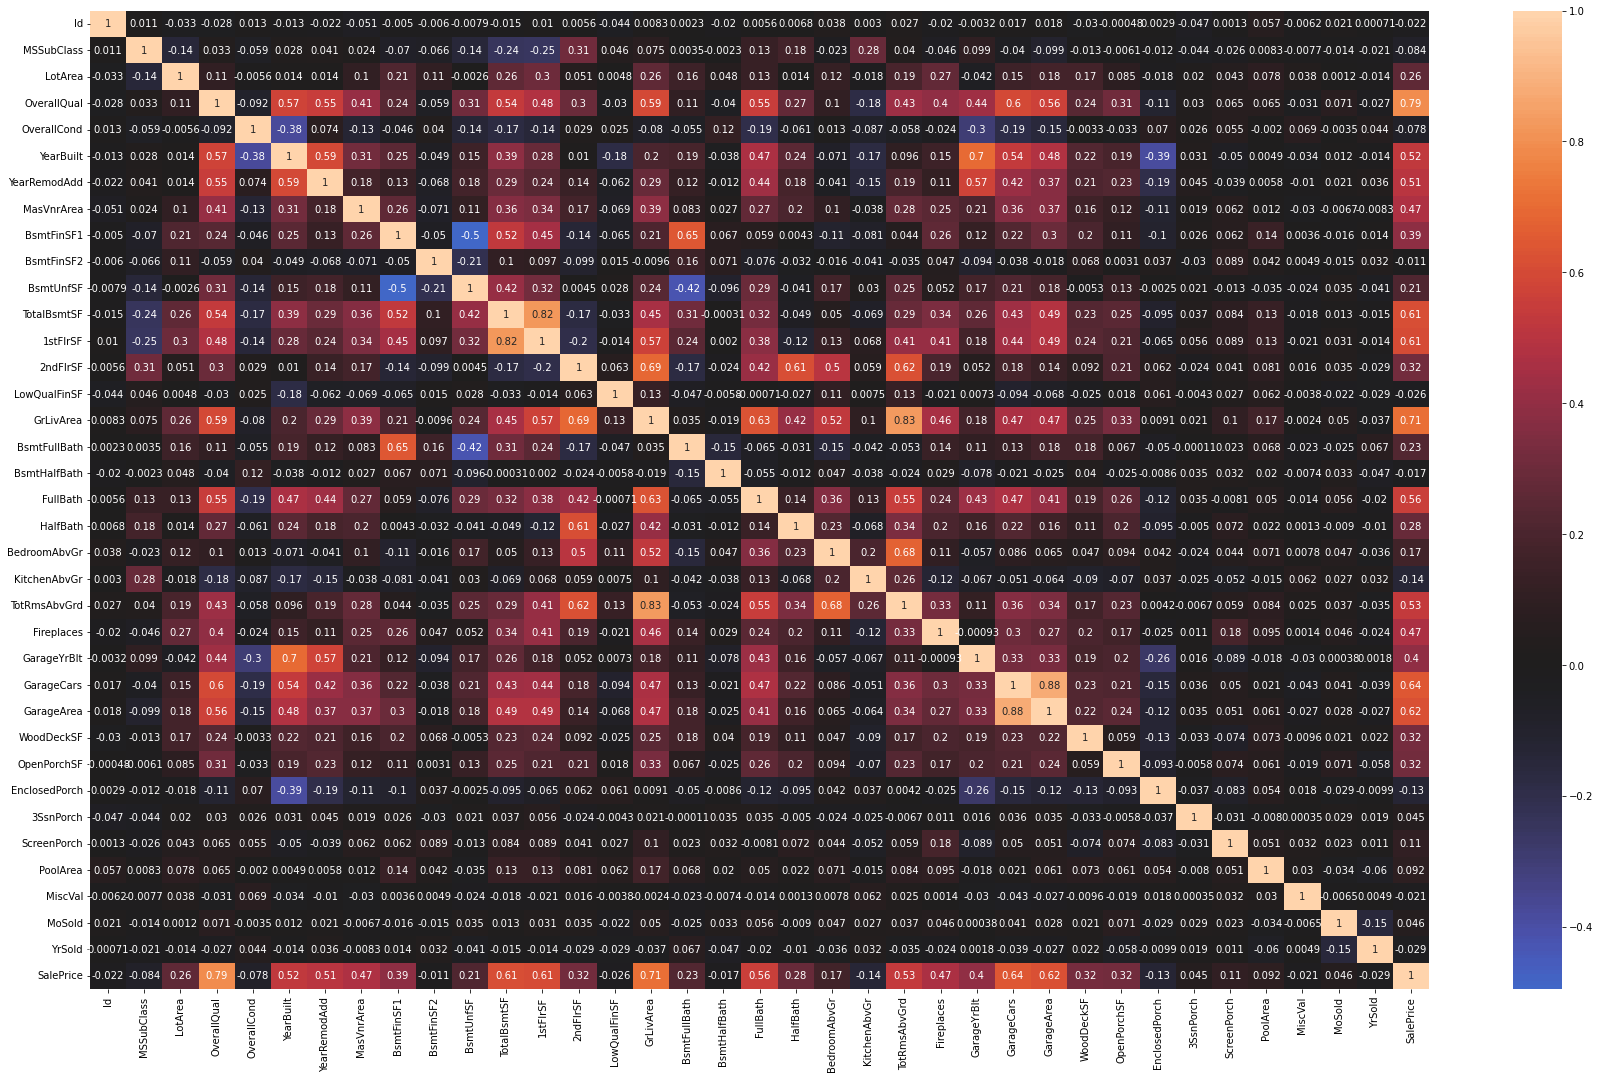

In [19]:
plt.figure(figsize = (30,18))
sns.heatmap(df_train.corr(),center=0,annot = True)

**Concatenating train and test data and doing one hot encoding for categorical data**

In [20]:
df = pd.concat([df_train,df_test],axis = 0)
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000.0
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000.0
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000.0
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000.0


**Feature Engineering**

In [21]:
def category(object_columns):
    df_final = df
    i = 0
    for fields in object_columns:
        
        print(fields)
        df1 = pd.get_dummies(df[fields],drop_first =True)
        
        df.drop([fields],axis = 1,inplace = True)
        if i==0:
            df_final =df1.copy()
        else:
            df_final = pd.concat([df_final,df1],axis = 1)
        i += 1
    df_final = pd.concat([df,df_final],axis =1)
    return df_final

In [22]:
categorical_feature = [feature for feature in df_train.columns if df_train[feature].dtype =='O']
len(categorical_feature)

38

In [23]:
df = category(categorical_feature)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [24]:
df.shape

(2919, 233)

In [25]:
train_df = df.iloc[:1460,:]
test_df = df.iloc[1460:,:]

In [26]:
print(train_df.shape)
print(test_df.shape)

(1460, 233)
(1459, 233)


<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

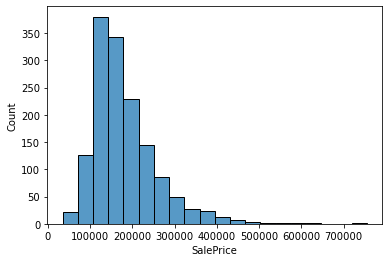

In [27]:
sns.histplot(x='SalePrice',data = train_df,bins = 20)

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

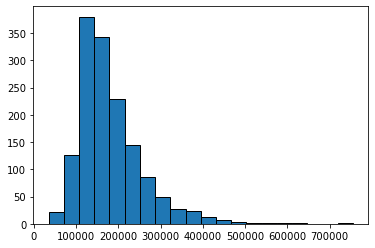

In [28]:
plt.hist(x='SalePrice',data = train_df,bins=20,rwidth=1.5,ec='black')

In [29]:
max_sellingprice = train_df['SalePrice'].max()
print('The Largest Sale Price :',max_sellingprice,'usd')

The Largest Sale Price : 755000.0 usd


In [30]:
max_YrSold = train_df['YrSold'].max()
print('Largest sale year  :',max_YrSold,'usd')

Largest sale year  : 2010 usd


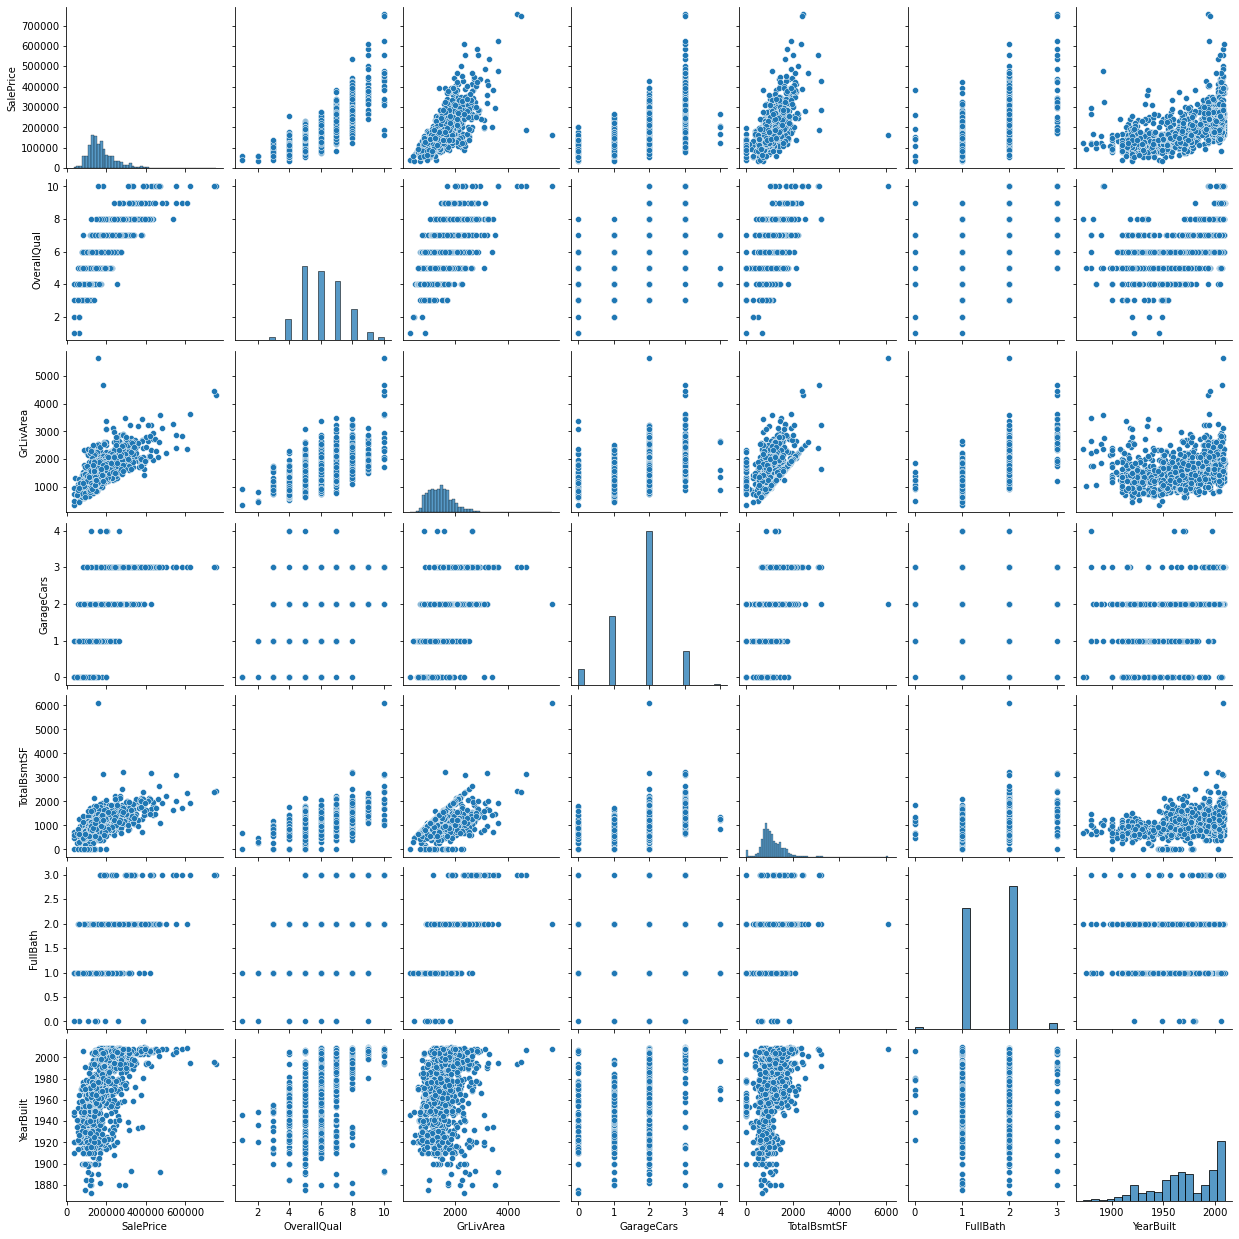

In [31]:
columns = ['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(train_df[columns])

In [32]:
train_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,0.0,732.0,0.0,...,0,0,0,0,1,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,186.0,1369.0,0.0,...,0,0,0,0,1,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,240.0,859.0,32.0,...,0,0,0,0,1,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,0.0,851.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
test_df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5,1466,60,10000,6,5,1993,1994,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
6,1467,20,7980,6,7,1992,2007,0.0,935.0,0.0,...,0,0,0,0,1,0,0,0,1,0
7,1468,60,8402,6,5,1998,1998,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
8,1469,20,10176,7,5,1990,1990,0.0,637.0,0.0,...,0,0,0,0,1,0,0,0,1,0
9,1470,20,8400,4,5,1970,1970,0.0,804.0,78.0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
test_df.drop(['SalePrice'],axis = 1 , inplace = True)

C:\Users\SHUBHAM\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
X_train = train_df.drop(['SalePrice'],axis = 1)
Y_train = train_df['SalePrice']

**Scaling The Data**

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
test_df = sc.transform(test_df)

In [37]:
X_train

array([[-1.73086488,  0.07337496, -0.20714171, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.7284922 , -0.87256276, -0.09188637, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.72611953,  0.07337496,  0.07347998, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 1.72611953,  0.30985939, -0.14781027, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7284922 , -0.87256276, -0.08016039, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73086488, -0.87256276, -0.05811155, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [38]:
test_df

array([[ 1.73323755, -0.87256276,  0.11076257, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.73561022, -0.87256276,  0.37584985, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 1.7379829 ,  0.07337496,  0.33205282, ..., -0.11785113,
         0.4676514 , -0.30599503],
       ...,
       [ 5.18784929, -0.87256276,  0.95042275, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [ 5.19022196,  0.66458604, -0.00759964, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 5.19259463,  0.07337496, -0.08918038, ..., -0.11785113,
         0.4676514 , -0.30599503]])

**Applying Linear Regression**

In [39]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [40]:
reg.coef_

array([ 3.60512212e+02, -1.59557417e+03,  7.69781488e+03,  8.87135353e+03,
        6.31305194e+03,  9.18443371e+03,  1.87548867e+03,  3.64344046e+03,
        3.11383256e+15,  1.10134468e+15,  3.01667501e+15, -2.99509021e+15,
        1.83956111e+15,  2.07720178e+15,  2.31370841e+14, -2.50047579e+15,
        3.05484375e+02, -1.88320312e+02,  2.02354688e+03,  4.69250000e+02,
       -2.74285938e+03, -2.72615625e+03,  1.69364062e+03,  1.64845703e+03,
        9.27843750e+02,  2.47396875e+03,  3.01282812e+03,  1.60714062e+03,
        3.74507812e+02,  3.11531250e+02,  1.03557812e+03,  1.61242188e+03,
        3.41625000e+03,  8.70937500e+01, -1.20037500e+03, -5.11914062e+02,
        7.16389062e+03,  2.76106250e+03,  1.15640938e+04,  8.60406250e+03,
        1.96406250e+03,  5.77875000e+02,  3.63503906e+02,  9.18750000e+02,
        1.61112500e+03, -1.51912500e+03,  1.90868750e+03, -8.25976562e+02,
        1.94050000e+03, -1.43968750e+03, -7.20980469e+02, -6.51703125e+02,
        1.36751562e+03, -

In [41]:
reg.intercept_

180921.84031250246

In [42]:
reg.score(X_train,Y_train)

0.9304279863889877

In [43]:
result = reg.predict(X_train)

In [44]:
compare_df = pd.DataFrame()
compare_df['Actual Values'] = Y_train
compare_df['Predicted Values'] = result
compare_df

,Actual Values,Predicted Values
0,208500.0,206427.116179
1,181500.0,206171.432787
2,223500.0,205816.194078
3,140000.0,167303.378904
4,250000.0,290563.540097
5,143000.0,142635.430189
6,307000.0,282247.552935
7,200000.0,217701.070692
8,129900.0,134912.459506
9,118000.0,122250.092501


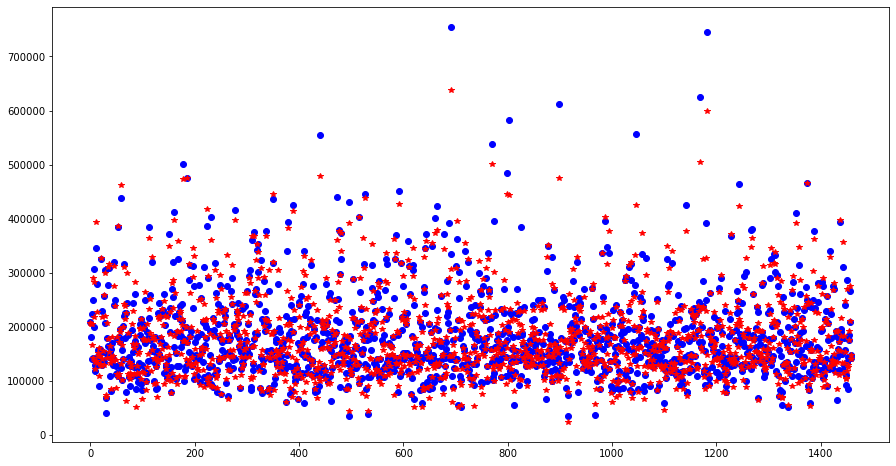

In [45]:
plt.figure(figsize = (15,8))
plt.plot(Y_train,'o', color = 'blue',label = 'Actual Values')
plt.plot(result,'*', color = 'red',label = 'Predicted values')

**final Prediction**

In [46]:
Y_pred = reg.predict(test_df)
Y_pred

array([112442.54806268, 162344.8194475 , 190122.47932832, ...,
       177088.47087347, 107382.95806563, 223166.56250217])

Creating submission file

In [47]:

df_submission = pd.DataFrame(list(zip(df_test["Id"], list(Y_pred))),columns =['Id', 'SalePrice'])

In [48]:
df_submission

,Id,SalePrice
0,1461,1.124425e+05
1,1462,1.623448e+05
2,1463,1.901225e+05
3,1464,1.962461e+05
4,1465,2.031562e+05
5,1466,1.733907e+05
6,1467,1.808674e+05
7,1468,1.606636e+05
8,1469,2.044960e+05
9,1470,1.163857e+05


In [49]:
# df_submission.to_csv('Submission.csv',index =False)